In [1]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from PIL import Image 
import matplotlib.pyplot as plt
import random



from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [2]:
# Directory where the images are stored (organized by class)
#dataset_dir = "../jup/kamen_rider_dataset"

In [3]:
# Initialize lists to store image data and labels
image_data = []
labels = []

In [2]:
def load_data(path):
    '''
    Load the dataset from the provided path.
    This will return a numpy array with paired images and class labels.
    '''
    # initialize the dataset to be filled
    X_data = []
    Y_data = np.array([])

    class_lab_int = -1  # class labels start at -1 and will increment

    # loop over all class-specific directories in the path parameter
    for directory in os.listdir(path):
        # record the class label as the directory name
        directory_path = os.path.join(path, directory)
        class_label = os.path.basename(directory_path)
        class_lab_int += 1  # increment class label for each directory

        # loop over files in class-specific directory
        for file in os.listdir(directory_path):
            file_path = os.path.join(directory_path, file)
            try:
                # Open and verify that it's an image file
                img = Image.open(file_path)
                img.verify()  # Verify that this is a valid image file
                img = Image.open(file_path)  # Reopen the file after verification

                # Convert the image to RGB to handle RGBA/other formats
                img = img.convert('RGB')

                # Resize the image to (224, 224) pixels
                sized_img = img.resize((224, 224))

                # Convert the resized image to a numpy array
                img_as_array = np.asarray(sized_img)

                # append image and label to dataset
                X_data.append(img_as_array)
                Y_data = np.append(Y_data, int(class_lab_int))

            except (IOError, ValueError) as e:
                print(f"Error processing file {file_path}: {e}")
                
                # Remove the corrupted file
                try:
                    os.remove(file_path)
                    print(f"Removed corrupted file: {file_path}")
                except OSError as remove_error:
                    print(f"Error removing file {file_path}: {remove_error}")
                continue  # Skip to the next file if there's an issue


    # Convert X_data to a numpy array
    X_data = np.array(X_data)

    return X_data, Y_data

In [3]:
dataset = load_data('../jup/kamen_rider_dataset')

c:\Users\liouz\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error processing file ../jup/kamen_rider_dataset\Kamen_Rider_Ghost\Kamen_Rider_Ghost_99.jpg: cannot identify image file '../jup/kamen_rider_dataset\\Kamen_Rider_Ghost\\Kamen_Rider_Ghost_99.jpg'
Removed corrupted file: ../jup/kamen_rider_dataset\Kamen_Rider_Ghost\Kamen_Rider_Ghost_99.jpg
Error processing file ../jup/kamen_rider_dataset\Kamen_Rider_Hibiki\Kamen_Rider_Hibiki_4.jpg: cannot identify image file '../jup/kamen_rider_dataset\\Kamen_Rider_Hibiki\\Kamen_Rider_Hibiki_4.jpg'
Removed corrupted file: ../jup/kamen_rider_dataset\Kamen_Rider_Hibiki\Kamen_Rider_Hibiki_4.jpg
Error processing file ../jup/kamen_rider_dataset\Kamen_Rider_Hibiki\Kamen_Rider_Hibiki_88.jpg: cannot identify image file '../jup/kamen_rider_dataset\\Kamen_Rider_Hibiki\\Kamen_Rider_Hibiki_88.jpg'
Removed corrupted file: ../jup/kamen_rider_dataset\Kamen_Rider_Hibiki\Kamen_Rider_Hibiki_88.jpg
Error processing file ../jup/kamen_rider_dataset\Kamen_Rider_Hibiki\Kamen_Rider_Hibiki_94.jpg: cannot identify image file '../j

In [11]:
X_data, Y_data = dataset

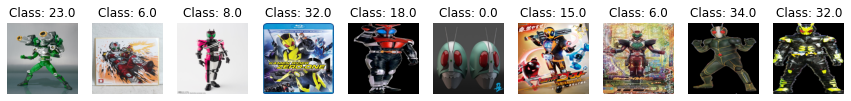

In [12]:


# Function to display random images from the dataset
def show_sample_images(X_data, Y_data, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i in range(num_images):
        idx = random.randint(0, len(X_data) - 1)
        image = X_data[idx]
        label = Y_data[idx]
        axes[i].imshow(image)
        axes[i].set_title(f"Class: {label}")
        axes[i].axis('off')
    plt.show()

# Assuming X_data and Y_data are loaded correctly from the dataset
show_sample_images(X_data, Y_data, num_images=10)

In [15]:

# Assuming X_data is your image data and Y_data are the labels
X_data = np.array(X_data)  # Make sure X_data is a numpy array
Y_data = np.array(Y_data)  # Make sure Y_data is a numpy array



In [21]:
# Flatten each image to a 1D vector (128*128 = 16,384 pixels)
X_data_flattened = [img.flatten() for img in X_data]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data_flattened, Y_data, test_size=0.2, random_state=42)

# Convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)


In [ ]:

# Initialize the SVM model
svm_classifier = svm.SVC(kernel='linear')  # You can try 'rbf', 'poly', etc. for the kernel

# Train the model
svm_classifier.fit(X_train, Y_train)

# Predict on the test data
Y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


In [ ]:
# Split the dataset into training and test sets (80% train, 20% test) 
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Print the shapes of the splits to verify
print(f"Training data shape: {X_train.shape}, Training labels shape: {Y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {Y_test.shape}")